In [21]:
#加载IMDB数据
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [22]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [23]:
train_labels[0]

1

In [24]:
max([max(sequence) for sequence in train_data])

9999

In [25]:
#将某条评论迅速解码为英文单词
word_index=imdb.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_review=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [54]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):  
    result=np.zeros((len(sequences),dimension))    #创建一个形状为(len(sequences),dimension)的零矩阵
    for i,sequence in enumerate(sequences):  #enumerate:python内置函数，枚举
        result[i,sequence]=1
    return result

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [55]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [56]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [58]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [32]:
model.compile(optimizer='rmsprop',           #优化器
             loss='binary_crossentropy',    #损失函数
             metrics=['accuracy'])     #测控指标   #用rmsprop优化器和binary_crossentropy损失函数来配置模型,将优化器、损失函数指标作为字符串传入

In [59]:
from keras import optimizers         #配置优化器

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [60]:
from keras import losses        #使用自定义的损失和指标
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [61]:
#留出验证集
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [62]:
#训练模型
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history=model.fit(partial_x_train,      #使用512个样本组成的小批量，将模型训练20个轮次
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 17s 1ms/step - loss: 0.5370 - acc: 0.7841 - val_loss: 0.4127 - val_acc: 0.8615
Epoch 2/20
15000/15000 [==============================] - 6s 392us/step - loss: 0.3315 - acc: 0.8945 - val_loss: 0.3189 - val_acc: 0.8853
Epoch 3/20
15000/15000 [==============================] - 4s 298us/step - loss: 0.2404 - acc: 0.9237 - val_loss: 0.2853 - val_acc: 0.8898
Epoch 4/20
15000/15000 [==============================] - 4s 290us/step - loss: 0.1877 - acc: 0.9393 - val_loss: 0.2746 - val_acc: 0.8902
Epoch 5/20
15000/15000 [==============================] - 4s 284us/step - loss: 0.1525 - acc: 0.9516 - val_loss: 0.2793 - val_acc: 0.8893
Epoch 6/20
15000/15000 [==============================] - 4s 278us/step - loss: 0.1220 - acc: 0.9649 - val_loss: 0.2904 - val_acc: 0.8850
Epoch 7/20
15000/15000 [==============================] - 4s 286us/step - l

In [63]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

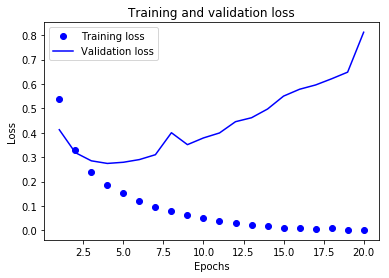

In [69]:
import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

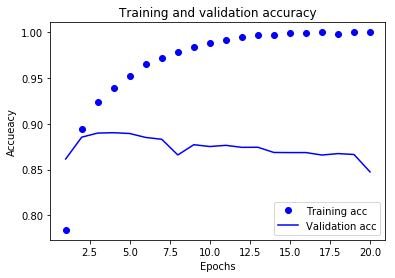

In [75]:
plt.clf()
acc=history_dict['acc']
val_acc=history_dict['val_acc']


plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accueacy')
plt.legend()

plt.show()

In [77]:
#从头开始训练一个模型
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)

results

Epoch 1/4
25000/25000 [==============================] - 15s 619us/step - loss: 0.4735 - acc: 0.8211
Epoch 2/4
25000/25000 [==============================] - 8s 319us/step - loss: 0.2672 - acc: 0.9091
Epoch 3/4
25000/25000 [==============================] - 6s 230us/step - loss: 0.2031 - acc: 0.9284
Epoch 4/4
25000/25000 [==============================] - 19s 767us/step


[0.31070485958099364, 0.87632]

In [78]:
model.predict(x_test)

array([[0.162444  ],
       [0.99983597],
       [0.41304466],
       ...,
       [0.08133784],
       [0.04933017],
       [0.46198514]], dtype=float32)